In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing Dataset
# rpp -> Renewable Power Plants
rpp = pd.read_csv("renewable_power_plants_UK.csv", engine='python')

- I am reading a downloaded kaggle dataset; whose link also can be found in the Readme.

In [2]:
# Checking top 5 of the dataset
rpp.head(5)

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,country,commissioning_date,solar_mounting_type,chp,capacity_individual_turbine,number_of_turbines,site_name,uk_beis_id,operator,comment
0,9.9,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKL,UKL1,UKL12,-4.033500,...,Wales,1906-01-01,NaN,NaN,NaN,NaN,Cwm Dyli,4882.0,RWE,NaN
1,19.5,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKM,UKM6,UKM63,-4.963406,...,Scotland,1909-01-01,NaN,NaN,NaN,NaN,Kinlochleven Hydro Power Station,391.0,Hydro Plan (on behalf of Alcan),NaN
2,65.0,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKM,UKM6,UKM63,-5.072590,...,Scotland,1929-01-01,NaN,NaN,NaN,NaN,Lochaber,6601.0,GFG Alliance,NaN
3,32.0,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKL,UKL1,UKL13,-3.842614,...,Wales,1938-01-01,NaN,NaN,NaN,NaN,Dolgarrog,4881.0,RWE,NaN
4,15.0,Renewable energy,Hydro,NaN,Other or unspecified technology,BEIS,UKM,UKM7,UKM77,-3.740559,...,Scotland,1950-01-01,NaN,NaN,NaN,NaN,Pitlochry,394.0,Scottish and Southern Energy (SSE),NaN


In [3]:
# Checking bottom 5 of the dataset
rpp.tail(5)

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,country,commissioning_date,solar_mounting_type,chp,capacity_individual_turbine,number_of_turbines,site_name,uk_beis_id,operator,comment
2616,0.5,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKD,UKD3,UKD36,-2.489471,...,England,2020-03-27,Roof,NaN,NaN,NaN,Tesco Crab Tree Lane,7251.0,Tesco Stores,NaN
2617,0.2,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKM,UKM7,UKM72,-3.408873,...,Scotland,2020-03-31,Ground,NaN,NaN,NaN,St Margarets Bay,7267.0,Scottish Water,NaN
2618,0.4,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKH,UKH1,UKH12,-0.039911,...,England,2020-04-02,Ground,NaN,NaN,NaN,Lamp Hill Wimpole Estate,7269.0,National Trust,NaN
2619,0.5,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKE,UKE1,UKE13,-0.045784,...,England,2020-06-03,Roof,NaN,NaN,NaN,Hewitts Avenue Tesco,7448.0,Push Energy,NaN
2620,5.0,Renewable energy,Solar,NaN,Photovoltaics,BEIS,UKL,UKL1,UKL16,-2.993490,...,Wales,2020-12-02,Ground,NaN,NaN,NaN,Mamhilad Solar Farm,5683.0,Active Renewables,NaN


In [4]:
rpp.shape

(2621, 25)

- Checking the shape of the dataframe, which comes out to be **2651 rows and 25 columns.**
- This dataframe is then reduced and transformed to declutter while retaining its content to best value.

In [5]:
rpp.columns

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'postcode', 'address', 'region', 'country', 'commissioning_date',
       'solar_mounting_type', 'chp', 'capacity_individual_turbine',
       'number_of_turbines', 'site_name', 'uk_beis_id', 'operator', 'comment'],
      dtype='object')

In [6]:
rpp.dtypes

electrical_capacity             object
energy_source_level_1           object
energy_source_level_2           object
energy_source_level_3           object
technology                      object
data_source                     object
nuts_1_region                   object
nuts_2_region                   object
nuts_3_region                   object
lon                            float64
lat                            float64
municipality                    object
postcode                        object
address                         object
region                          object
country                         object
commissioning_date              object
solar_mounting_type             object
chp                             object
capacity_individual_turbine    float64
number_of_turbines             float64
site_name                       object
uk_beis_id                     float64
operator                        object
comment                         object
dtype: object

In [7]:
# Renaming Columns for better understanding
cols = ['electrical_capacity','energy_source_level_1','energy_source_level_2','energy_source_level_3','technology','data_source','region_1','region_2','region_3',
        'longitude','latitude','municipality','postcode','address','region','country','commissioning_date','solar_mounting_type','combined_heat_power',
        'capacity_individual_turbine','number_of_turbines','site_name','uk_beis_id','operator','comment']
rpp.columns = cols

- Renaming the columns with basic english words to understand the respective columns in a better way.

In [8]:
# Checking for missing values
rpp.isnull().sum()

electrical_capacity               0
energy_source_level_1             1
energy_source_level_2             1
energy_source_level_3          2050
technology                      340
data_source                       1
region_1                          3
region_2                          3
region_3                          3
longitude                         3
latitude                          3
municipality                      3
postcode                       1421
address                           8
region                            2
country                           2
commissioning_date                1
solar_mounting_type            1492
combined_heat_power            2058
capacity_individual_turbine    1843
number_of_turbines             1843
site_name                         1
uk_beis_id                        1
operator                         39
comment                        2619
dtype: int64

- In the above instance, we can see there is lot of missing values. These values either means that somewhere its equivalent data is present in different feature or that the data is simple empty, which will be removed. 
- Further some data transformation and construction will be applied to reduce the null values.
- Also, paired feature will have null values as to 1s and 0s

In [9]:
# Checking for duplicate entries
rpp.duplicated().sum()

0

In [10]:
rpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   electrical_capacity          2621 non-null   object 
 1   energy_source_level_1        2620 non-null   object 
 2   energy_source_level_2        2620 non-null   object 
 3   energy_source_level_3        571 non-null    object 
 4   technology                   2281 non-null   object 
 5   data_source                  2620 non-null   object 
 6   region_1                     2618 non-null   object 
 7   region_2                     2618 non-null   object 
 8   region_3                     2618 non-null   object 
 9   longitude                    2618 non-null   float64
 10  latitude                     2618 non-null   float64
 11  municipality                 2618 non-null   object 
 12  postcode                     1200 non-null   object 
 13  address           

## Feature Construction and Transformation

In [11]:
# Dropping irrelative columns
rpp.drop('energy_source_level_1', axis=1, inplace=True)
rpp.drop('data_source', axis=1, inplace=True)

- The _energy source level1_ means first source of information which is Renewable for all the types of energy sources. Therefore, it is dropped as it doesn't add any value to the dataframe.
- _data source_ is another feature which is same for all the entries and hence dropped.

### Feature Manipulating

##### In the following code segment, many sources have other sub sources and to distinguish and to get a high-value understanding of the Renewable Energy Source distribution; 
- These features and its sub-features are being splitted.
- The original features then are bring dropped as their sub features have been extracted and poses the best data possible.


In [12]:
# Creating new features and separating energy sources from energy_source_level_2 and energy_source_level_3
rpp['hydro_energy_source'] = (rpp['energy_source_level_2'] == 'Hydro').astype(int)
rpp['marine_energy_source'] = (rpp['energy_source_level_2'] == 'Marine').astype(int)
rpp['solar_energy_source'] = (rpp['energy_source_level_2'] == 'Solar').astype(int)
rpp['wind_energy_source'] = (rpp['energy_source_level_2'] == 'Wind').astype(int)
rpp['biomass_biogas_energy_source'] = ((rpp['energy_source_level_2'] == 'Bioenergy') & (rpp['energy_source_level_3'] == 'Biomass and Biogas')).astype(int)
rpp['sewage_landfill_energy_source'] = ((rpp['energy_source_level_2'] == 'Bioenergy') & (rpp['energy_source_level_3'] == 'Sewage and landfill gas')).astype(int)
rpp['other_energy_source'] = ((rpp['energy_source_level_2'] == 'Bioenergy') & (rpp['energy_source_level_3'] == 'Other bioenergy and renewable waste')).astype(int)

# Dropping more irrelevant features after transforming
rpp.drop(['energy_source_level_2','energy_source_level_3','region_1','region_2','region_3','longitude','latitude','postcode'
          ,'municipality','address','uk_beis_id','comment','uk_beis_id'], axis=1, inplace=True)
rpp.head()

,electrical_capacity,technology,region,country,commissioning_date,solar_mounting_type,combined_heat_power,capacity_individual_turbine,number_of_turbines,site_name,operator,hydro_energy_source,marine_energy_source,solar_energy_source,wind_energy_source,biomass_biogas_energy_source,sewage_landfill_energy_source,other_energy_source
0,9.9,Other or unspecified technology,Wales,Wales,1906-01-01,NaN,NaN,NaN,NaN,Cwm Dyli,RWE,1,0,0,0,0,0,0
1,19.5,Other or unspecified technology,Scotland,Scotland,1909-01-01,NaN,NaN,NaN,NaN,Kinlochleven Hydro Power Station,Hydro Plan (on behalf of Alcan),1,0,0,0,0,0,0
2,65.0,Other or unspecified technology,Scotland,Scotland,1929-01-01,NaN,NaN,NaN,NaN,Lochaber,GFG Alliance,1,0,0,0,0,0,0
3,32.0,Other or unspecified technology,Wales,Wales,1938-01-01,NaN,NaN,NaN,NaN,Dolgarrog,RWE,1,0,0,0,0,0,0
4,15.0,Other or unspecified technology,Scotland,Scotland,1950-01-01,NaN,NaN,NaN,NaN,Pitlochry,Scottish and Southern Energy (SSE),1,0,0,0,0,0,0


In [13]:
rpp['offshore_wind'] = (rpp['technology'] == 'Offshore').astype(int)
rpp['onshore_wind'] = (rpp['technology'] == 'Onshore').astype(int)

In [14]:
rpp.drop('technology', axis=1, inplace=True)

In [15]:
# Dealing with electrical_capacity 
rpp['electrical_capacity'].dtypes

dtype('O')

- Converting the '0' data types to float

In [16]:
# Converting object to num
rpp["electrical_capacity"] = pd.to_numeric(rpp["electrical_capacity"], errors="coerce")

In [17]:
# Replacing the blanks with NaN
rpp['electrical_capacity'].dtypes

dtype('float64')

In [18]:
rpp['electrical_capacity'].isnull().sum()

1

- Checking and removing the null entry in the feature electrical capacity.

In [19]:
rpp.dropna(subset=['electrical_capacity'], inplace=True)
rpp['electrical_capacity'].isnull().sum()

0

In [20]:
# Dealing with solar_mounting_type 
rpp['solar_mounting_type'].replace({None:np.nan},inplace=True)
rpp['solar_mounting_type'].unique()

array([nan, 'Ground', 'Roof', 'Floating'], dtype=object)

- Checking the distribution of the _solar mounting type_ feature distribution for 'Ground', 'Roof' and 'Floating'.
- Visualising this idea in a barplot

<Axes: xlabel='solar_mounting_type'>

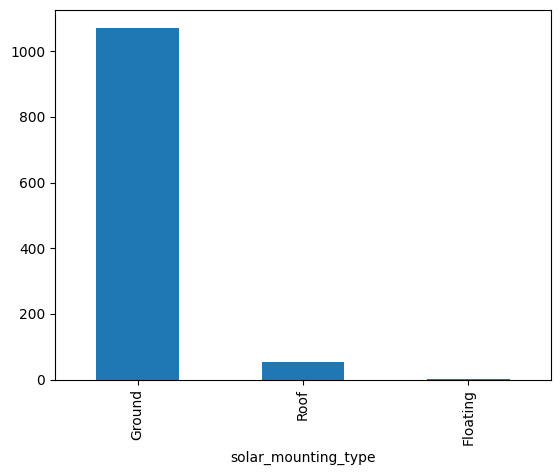

In [21]:
# Count of different types of mounted solar panels
rpp['solar_mounting_type'].value_counts().plot(kind='bar')

- The above categorical fetaure _solar mounting type_ is not kept as it because dividing the feature won't add any new value to the dataset.
- And it is very independent feature which poses no dependecies with other features.

In [22]:
# Dealing with combined_heat_power 
rpp['combined_heat_power'].replace({None:np.nan},inplace=True)
rpp['combined_heat_power'].unique()

array([nan, 'yes', 'no'], dtype=object)

<Axes: xlabel='combined_heat_power'>

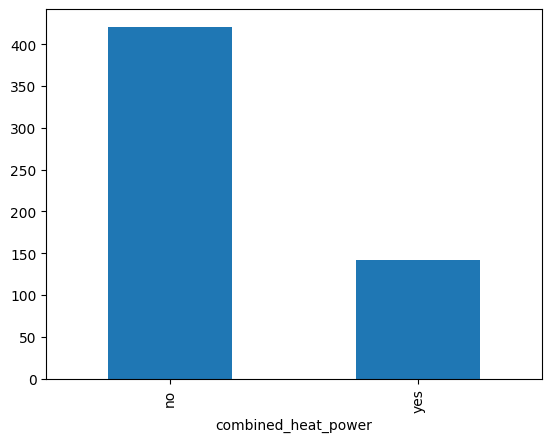

In [23]:
# Count of combined heat power difference
chp_rpp = rpp[['combined_heat_power','hydro_energy_source','marine_energy_source','solar_energy_source','wind_energy_source',
                         'biomass_biogas_energy_source','sewage_landfill_energy_source','other_energy_source','offshore_wind',
                          'onshore_wind']]

chp_rpp['combined_heat_power'].value_counts().plot(kind='bar')

- Some more data transformation and data type correction.

In [24]:
# Dealing with capacity_individual_turbine 
rpp['capacity_individual_turbine'].replace({None:np.nan},inplace=True)
rpp['capacity_individual_turbine'].value_counts()
nan_counts = rpp['capacity_individual_turbine'].isna().sum()
nan_counts

1842

In [25]:
# Dealing with number_of_turbines 
rpp['number_of_turbines'].replace({None:np.nan},inplace=True)
rpp['number_of_turbines'].value_counts()
nan_counts = rpp['number_of_turbines'].isna().sum()
nan_counts

1842

In [26]:
rpp.dropna(subset=['country'], inplace=True)
rpp['electrical_capacity'].isnull().sum()

0

In [27]:
rpp['commissioning_date'].dtypes

dtype('O')

In [28]:
rpp['commissioning_date'] = pd.to_datetime(rpp['commissioning_date'])
rpp['commissioning_date'].dtypes

dtype('<M8[ns]')

In [29]:
# Reordering the columns after transforming features
rpp = rpp[['electrical_capacity' , 'hydro_energy_source', 'marine_energy_source',
       'solar_energy_source', 'wind_energy_source',
       'biomass_biogas_energy_source', 'sewage_landfill_energy_source',
       'other_energy_source', 'offshore_wind', 'onshore_wind',
       'solar_mounting_type', 'combined_heat_power',
       'capacity_individual_turbine', 'number_of_turbines', 'region', 'country', 'commissioning_date' ,'site_name',
       'operator']]

In [30]:
rpp.head()

,electrical_capacity,hydro_energy_source,marine_energy_source,solar_energy_source,wind_energy_source,biomass_biogas_energy_source,sewage_landfill_energy_source,other_energy_source,offshore_wind,onshore_wind,solar_mounting_type,combined_heat_power,capacity_individual_turbine,number_of_turbines,region,country,commissioning_date,site_name,operator
0,9.9,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Wales,Wales,1906-01-01,Cwm Dyli,RWE
1,19.5,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Scotland,Scotland,1909-01-01,Kinlochleven Hydro Power Station,Hydro Plan (on behalf of Alcan)
2,65.0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Scotland,Scotland,1929-01-01,Lochaber,GFG Alliance
3,32.0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Wales,Wales,1938-01-01,Dolgarrog,RWE
4,15.0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Scotland,Scotland,1950-01-01,Pitlochry,Scottish and Southern Energy (SSE)


- In the following output of the code, we can see there is drastic improvement in number of mulls in the features. 

In [54]:
rpp.isnull().sum()

electrical_capacity                 0
hydro_energy_source                 0
marine_energy_source                0
solar_energy_source                 0
wind_energy_source                  0
biomass_biogas_energy_source        0
sewage_landfill_energy_source       0
other_energy_source                 0
offshore_wind                       0
onshore_wind                        0
solar_mounting_type              1491
combined_heat_power              2056
capacity_individual_turbine      1841
number_of_turbines               1841
region                              0
country                             0
commissioning_date                  0
site_name                           0
operator                           38
number_of_PoPl_by_years             0
dtype: int64

- Saving the updated dataframe to CSV for further manual analyses and observations.

In [31]:
rpp.to_csv('EDA_test.csv', sep=',', index=False, encoding='utf-8')

In [32]:
rpp.dtypes

electrical_capacity                     float64
hydro_energy_source                       int32
marine_energy_source                      int32
solar_energy_source                       int32
wind_energy_source                        int32
biomass_biogas_energy_source              int32
sewage_landfill_energy_source             int32
other_energy_source                       int32
offshore_wind                             int32
onshore_wind                              int32
solar_mounting_type                      object
combined_heat_power                      object
capacity_individual_turbine             float64
number_of_turbines                      float64
region                                   object
country                                  object
commissioning_date               datetime64[ns]
site_name                                object
operator                                 object
dtype: object

## Graphical Representation 

### Total Electrical Capacity recorded in the data?

In [33]:
rpp['electrical_capacity'].sum()

41692.1

### How many sites are included in the data?

In [34]:
len(rpp['site_name'].value_counts().tolist())

2609

In [35]:
# Representing the number of power plants over the years from 1906 to 2020
rpp['number_of_PoPl_by_years'] = rpp['commissioning_date'].dt.year
rpp['number_of_PoPl_by_years'].describe()

count    2619.000000
mean     2011.407026
std         8.901295
min      1906.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: number_of_PoPl_by_years, dtype: float64

In [55]:
# Quantifying the number of Power plants built
print(rpp['number_of_PoPl_by_years'].value_counts().idxmax(), rpp['number_of_PoPl_by_years'].value_counts())

2015 number_of_PoPl_by_years
2015    427
2016    401
2014    305
2017    284
2013    233
2012    107
2011     98
2018     66
2010     55
2000     46
2008     46
2009     45
2005     45
2004     45
2003     42
2019     42
2006     41
2007     36
1999     36
2002     35
1998     33
1996     31
2001     30
1997     16
2020     11
1993      8
1995      7
1962      5
1994      5
1959      4
1992      4
1956      4
1961      3
1974      2
1952      2
1958      2
1957      2
1954      1
1929      1
1938      1
1950      1
1951      1
1953      1
1909      1
1955      1
1966      1
1968      1
1975      1
1980      1
1982      1
1983      1
1906      1
Name: count, dtype: int64


- Here, I am plotting the number of power plants built by year. 
- This will further give me idea of how many years or decades contribute the most to the data.

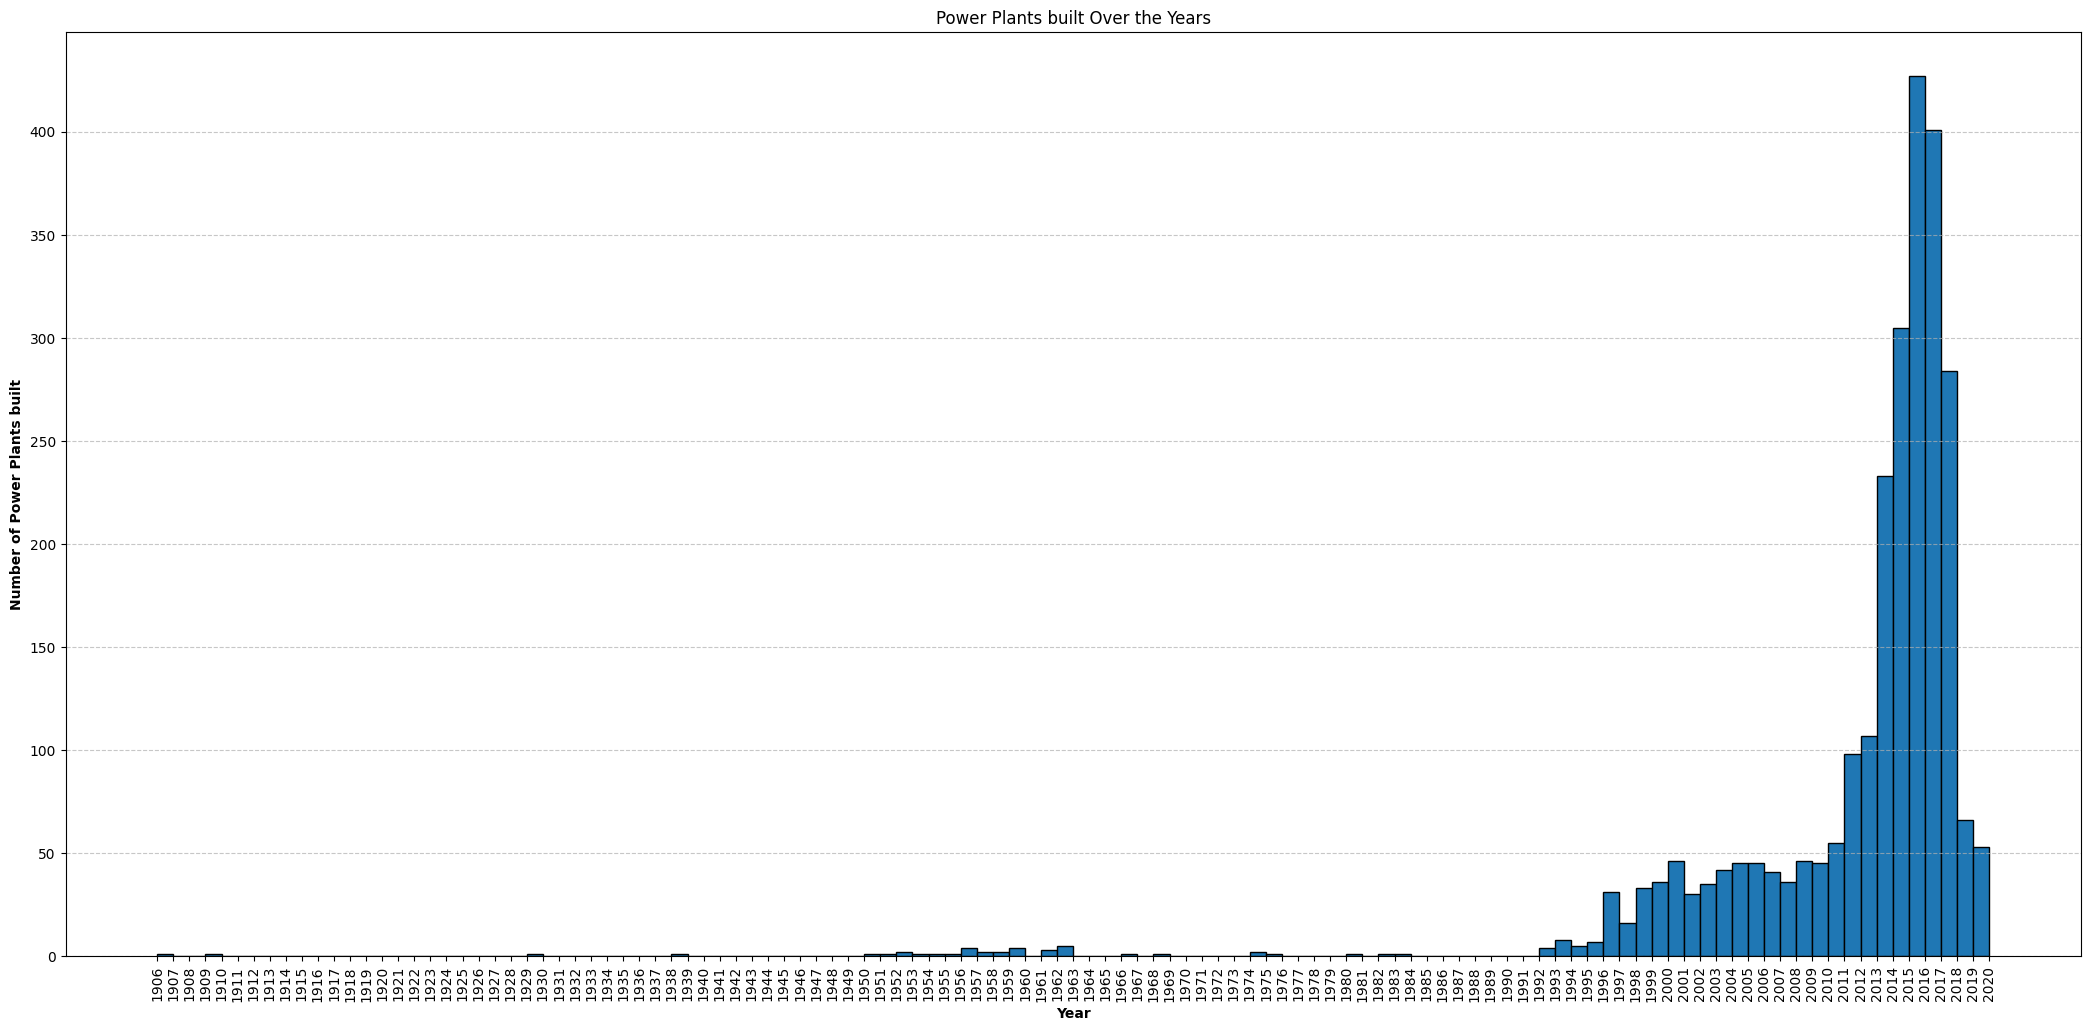

In [37]:
# Graphical representationm of the number of Power plants built
plt.figure(figsize=(26, 12))
plt.hist(rpp['number_of_PoPl_by_years'], bins=range(rpp['number_of_PoPl_by_years'].min(), rpp['number_of_PoPl_by_years'].max() + 1), edgecolor='black')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Power Plants built', fontweight='bold')
plt.title('Power Plants built Over the Years')
plt.xticks(range(rpp['number_of_PoPl_by_years'].min(), rpp['number_of_PoPl_by_years'].max() + 1), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- As we can see in the above barplot, before the year 1992 there were m=not many power plants built. 
- Hence including these entries of power plant before the year of 1992 may give us unnecessary noise and dimension explosion.
- THerefore, to perform EDA, only the **Significant Years** is being considered; that is from **1992 to 2020**

In [38]:
# Hard setting the significant year >> From the above histogram
significantStartYear = int(1990)
# rpp_ssy => renewable power plants with significant years
rpp_ssy = rpp[rpp['number_of_PoPl_by_years'] > significantStartYear]
rpp_ssy.to_csv('EDA_test.csv', sep=',', index=False, encoding='utf-8')

### How many Power Plants built from 1992 to 2020?

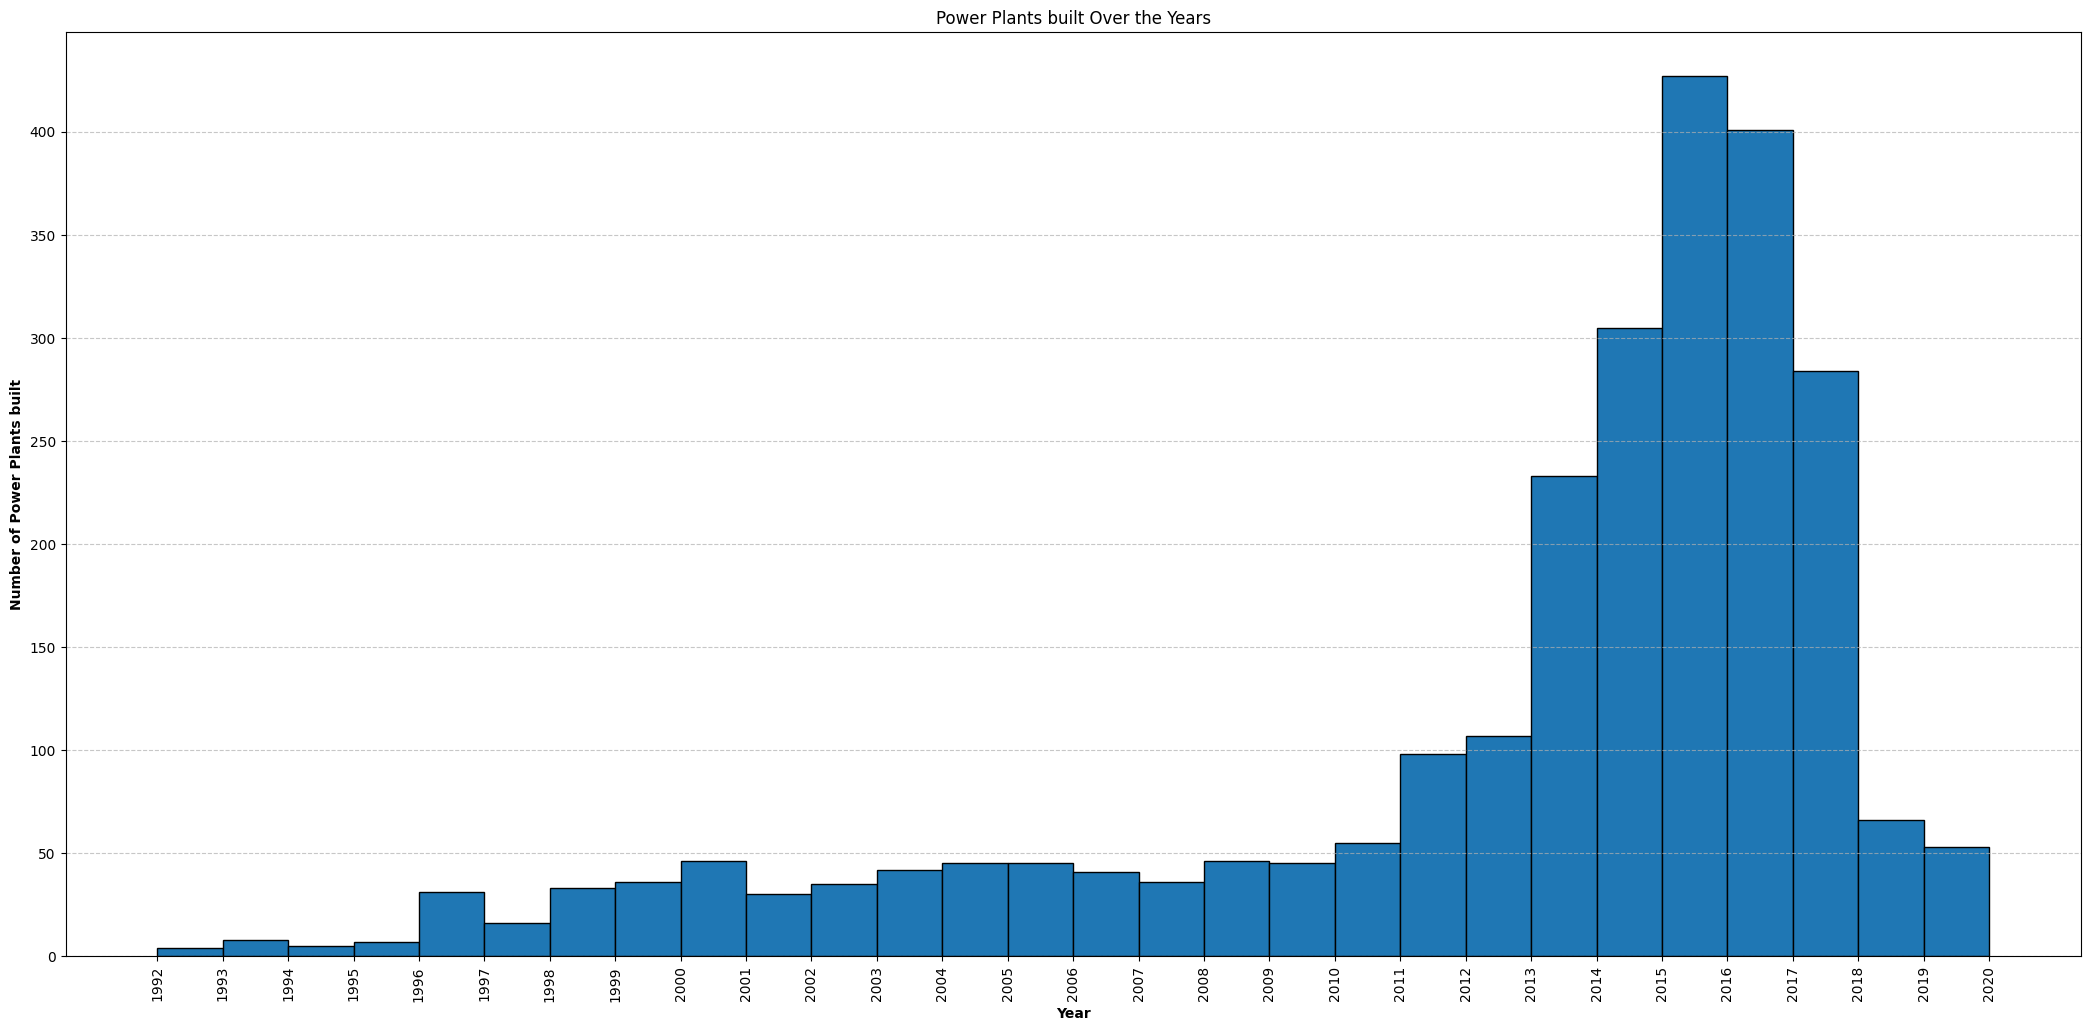

In [39]:
# Graphical representationm of the number of Power plants built by narrowing down to significant years
plt.figure(figsize=(26, 12))
plt.hist(rpp_ssy['number_of_PoPl_by_years'], bins=range(rpp_ssy['number_of_PoPl_by_years'].min(), rpp_ssy['number_of_PoPl_by_years'].max() + 1), edgecolor='black')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Power Plants built', fontweight='bold')
plt.title('Power Plants built Over the Years')
plt.xticks(range(rpp_ssy['number_of_PoPl_by_years'].min(), rpp_ssy['number_of_PoPl_by_years'].max() + 1), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
rpp_ssy.groupby('country').size()

country
England             1783
Northern Ireland     114
Scotland             464
Wales                219
dtype: int64

### Various energy sources distribution

In [41]:
def diff_in_sourceCount(df):
    global sources 
    sources= ['hydro_energy_source','marine_energy_source','solar_energy_source','wind_energy_source','biomass_biogas_energy_source',
            'sewage_landfill_energy_source','other_energy_source']
    sources_count = []
    for i in sources:
        sources_count.append(df[i].value_counts()[1])
    return sources_count

print("Renewable Energy sources from 1906 to 2020: ",diff_in_sourceCount(rpp))
print("Renewable Energy sources from 1992 to 2020: ",diff_in_sourceCount(rpp_ssy))

differences = [a - b for a, b in zip(diff_in_sourceCount(rpp), diff_in_sourceCount(rpp_ssy))]
print("Differnce of count between overall years and significant years:", differences)

Renewable Energy sources from 1906 to 2020:  [94, 6, 1170, 778, 238, 280, 53]
Renewable Energy sources from 1992 to 2020:  [57, 6, 1170, 778, 238, 280, 51]
Differnce of count between overall years and significant years: [37, 0, 0, 0, 0, 0, 2]


- After validating the difference in the data between All Years and Significant Years, we can conclude that SIgnificant Years does not lose much data.

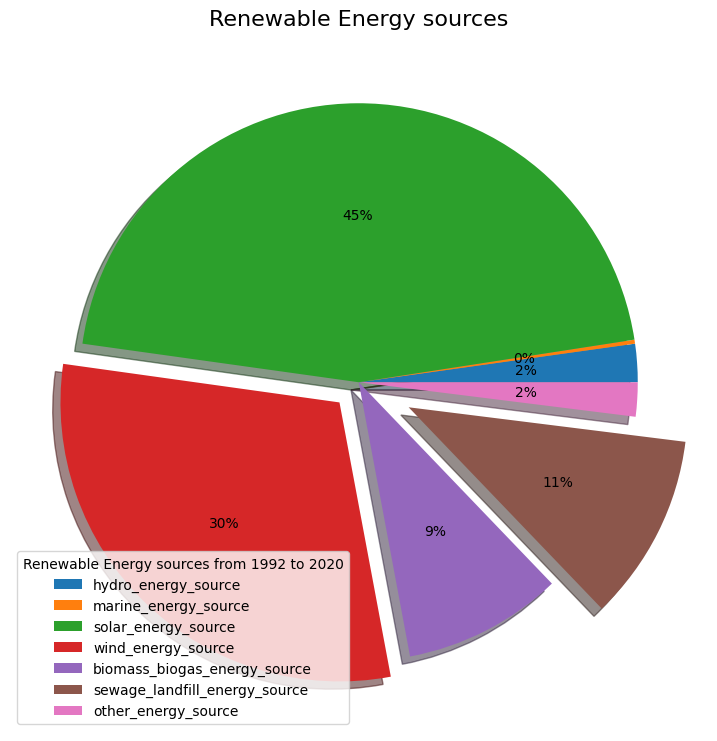

In [56]:
legend_labels = sources
explode = (0, 0, 0, 0.1, 0, 0.2, 0)
fig = plt.figure(figsize=(9, 10))
plt.pie(diff_in_sourceCount(rpp_ssy), explode=explode, shadow=True, autopct = '%1.0f%%')
plt.legend(legend_labels, title='Renewable Energy sources from 1992 to 2020', loc='lower left')
plt.title('Renewable Energy sources', fontsize=16) 
plt.show()

- In the following code snippet, I have applied a simple coding practive to print, plot and visualize how much electrical capacity is been drawn with respect to years.

In [43]:
years = list(rpp_ssy['number_of_PoPl_by_years'].unique())
sum_electrical_capacity = []
for i in years:
    result = rpp_ssy.loc[rpp_ssy['number_of_PoPl_by_years'] == i, 'electrical_capacity']
    sum_electrical_capacity.append(sum(result.to_list()))
    # print("Year: {0} - {1} ".format(i, sum(result.to_list())))
print(sum_electrical_capacity)

[22.8, 99.2, 29.9, 35.5, 151.8, 83.7, 196.4, 121.3, 243.8, 165.0, 253.3, 200.9, 540.5, 585.5, 571.5, 809.9, 1005.0, 814.5, 1078.0, 923.2, 2723.8, 3974.8, 4047.6, 4916.2, 3523.1, 5284.3, 3627.4, 1128.3, 1253.9]


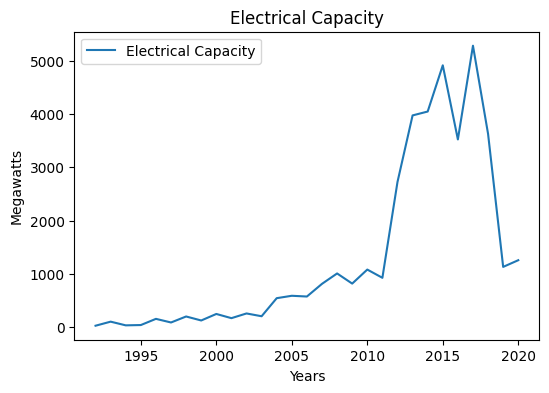

In [44]:
fig = plt.figure(figsize=(6, 4))
plt.plot(years, sum_electrical_capacity, label = "Electrical Capacity")
plt.xlabel("Years")
plt.ylabel("Megawatts")
plt.title('Electrical Capacity')
plt.legend() 
plt.show()

- Similarly like above, I am running through the number of plants built over the years.

In [45]:
No_power_plants = rpp_ssy['number_of_PoPl_by_years'].value_counts().sort_index().tolist()
print(No_power_plants)

[4, 8, 5, 7, 31, 16, 33, 36, 46, 30, 35, 42, 45, 45, 41, 36, 46, 45, 55, 98, 107, 233, 305, 427, 401, 284, 66, 42, 11]


- Now we have idea about the electrical capacity and number of power plants over the years, we can check their relation if it exists.

### Is there a relation between number of power plants and total electrical capacity?

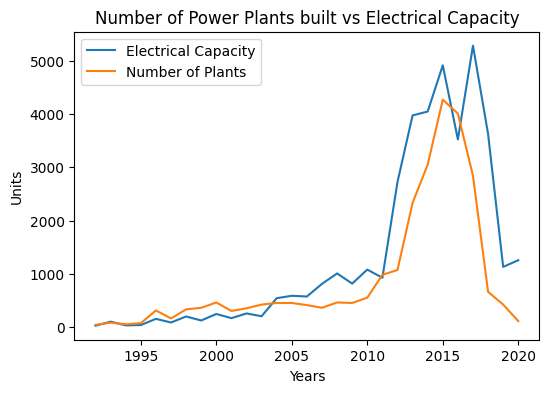

In [46]:
# Scaling the number the plants built to electrical capacity by mutiplying by 10
No_power_plantsx10 = [i * 10 for i in No_power_plants]

# Visual represntation for the correlation between Number of Power Plants built vs Electrical Capacity over the years
fig = plt.figure(figsize=(6, 4))
plt.plot(years, sum_electrical_capacity, label = "Electrical Capacity")
plt.plot(years, No_power_plantsx10, label = "Number of Plants")
plt.xlabel("Years")
plt.ylabel("Units")
plt.title('Number of Power Plants built vs Electrical Capacity')
plt.legend() 
plt.show()

- As we can see there is a clear trend between the features. We conclude that number of power plants does contribute to more renewable electrical capacity.

### How is the renewable electrical power is being distributed among various power plants types?

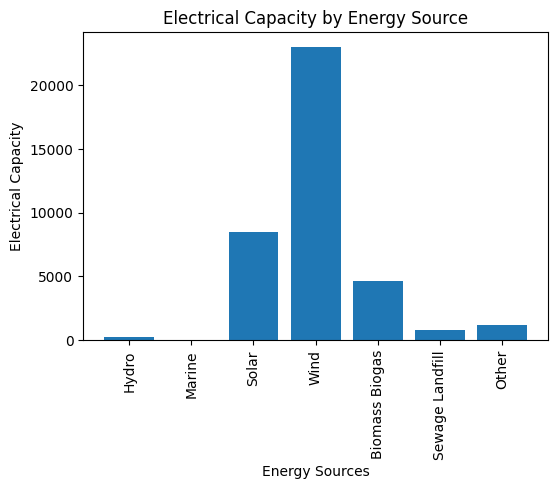

In [47]:
# Visual represntation of Electrical Capacity between the sources

# Calculating the capacity of each sources one by one
sourcesCap = []
for i in sources:
    j = rpp_ssy.loc[rpp_ssy[i] == 1, 'electrical_capacity'].sum()
    sourcesCap.append(j)

fig = plt.figure(figsize=(6, 4))
plt.bar(['Hydro', 'Marine', 'Solar', 'Wind', 'Biomass Biogas', 'Sewage Landfill', 'Other'], sourcesCap)
plt.xlabel('Energy Sources')
plt.xticks(rotation=90)
plt.ylabel('Electrical Capacity')
plt.title('Electrical Capacity by Energy Source')
plt.show()

### What is the average capacity of all sources in the data?

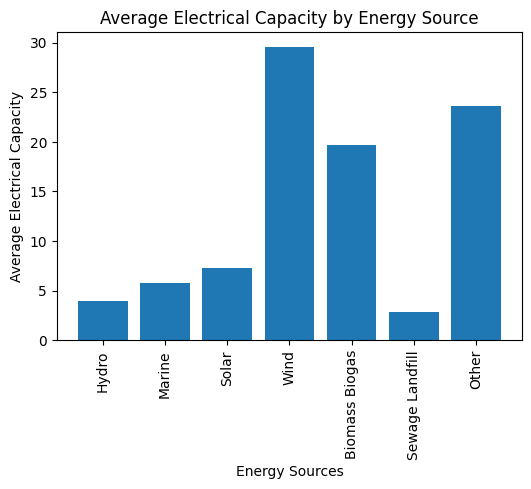

In [48]:
# Calculating the average electrical capacity to gain better understanding of which power plant type is the most prevalent
avgCapacity = []
for i in sources:
    j = rpp_ssy.loc[rpp_ssy[i] == 1, 'electrical_capacity'].mean()
    avgCapacity.append(j)

fig = plt.figure(figsize=(6, 4))
plt.bar(['Hydro', 'Marine', 'Solar', 'Wind', 'Biomass Biogas', 'Sewage Landfill', 'Other'], avgCapacity)
plt.xlabel('Energy Sources')
plt.xticks(rotation=90)
plt.ylabel('Average Electrical Capacity')
plt.title('Average Electrical Capacity by Energy Source')
plt.show()

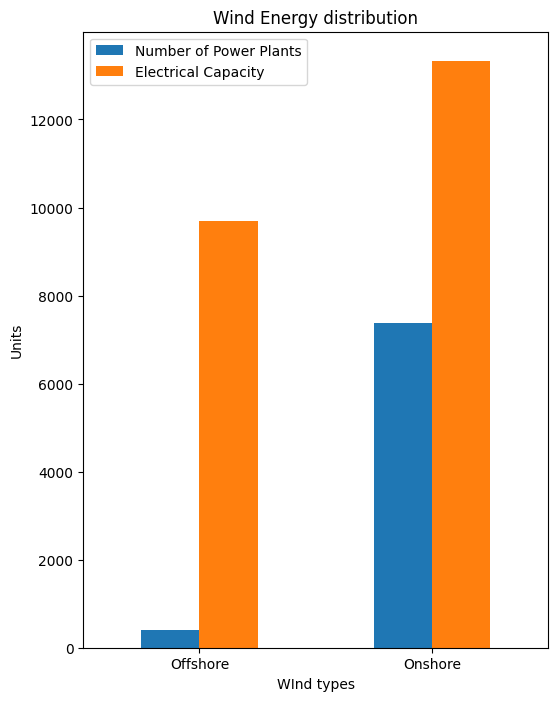

In [49]:
# Visual represntation of Wind Energy distribution and its Electrical Capacity

# Calculating the wind plants count and its capacity
windSources = ['offshore_wind', 'onshore_wind']
windCount = []
for i in windSources:
    j = rpp_ssy.loc[rpp_ssy[i] == 1, i].sum()
    windCount.append(j)

windCap = []
for i in windSources:
    j = rpp_ssy.loc[rpp_ssy[i] == 1, 'electrical_capacity'].sum()
    windCap.append(j)
# Scaling Wind Energy Power Plants count to Its Electrical Capacity
windCount = [i * 10 for i in windCount]

windTypes = ['Offshore', 'Onshore']
wpp = pd.DataFrame({'Number of Power Plants': windCount, 'Electrical Capacity': windCap}, index=windTypes)
ax = wpp.plot(kind='bar', figsize=(6, 8), rot=0, title='Wind Energy distribution', ylabel='Units', xlabel = 'WInd types')
plt.show()

### Is the capacity of an individual turbine increasing over the years? 
### If so, then is it contributing to the overall energy capacity?

- In the following code, I have applied similar coding practice to visualise how well the new wind turbines are than the old.
- How well the new wind power plants are over the old in terms of electrical capacity.

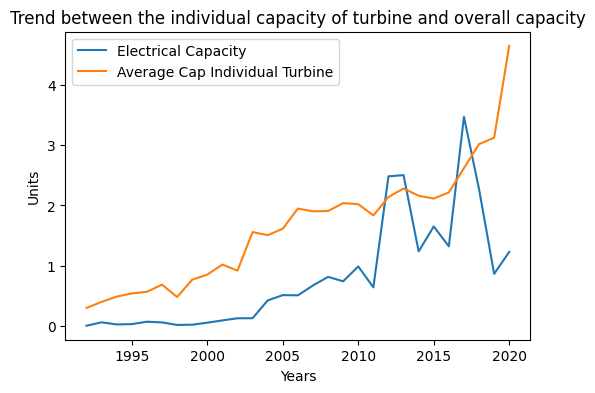

In [50]:
# Checking the trend between individual capacity of turbine and overall capacity
windCapData = []
for i in years:
    j = rpp_ssy.loc[(rpp_ssy['number_of_PoPl_by_years'] == i) & (rpp_ssy['wind_energy_source'] == 1), 'electrical_capacity'].sum()
    windCapData.append(j)
windCapData = [i / 1000 for i in windCapData]

windIndData = []
for i in years:
    j = rpp_ssy.loc[(rpp_ssy['number_of_PoPl_by_years'] == i) & (rpp_ssy['wind_energy_source'] == 1), 'capacity_individual_turbine'].mean()
    windIndData.append(j)

fig = plt.figure(figsize=(6, 4))
plt.plot(years, windCapData, label = "Electrical Capacity")
plt.plot(years, windIndData, label = "Average Cap Individual Turbine")
plt.xlabel("Years")
plt.ylabel("Units")
plt.title('Trend between the individual capacity of turbine and overall capacity')
plt.legend() 
plt.show()

- As you can see after visualsing, we get a clear picture that the newer power plants have more electrical capacity than the older power plants.

In [51]:
df = rpp_ssy[['country','hydro_energy_source','marine_energy_source','solar_energy_source','wind_energy_source',
              'biomass_biogas_energy_source','sewage_landfill_energy_source','other_energy_source']]
most_common_source = df.groupby('country').sum().idxmax(axis=1)
source_counts = df.groupby('country').sum().max(axis=1)
most_common_df = pd.concat([most_common_source, source_counts], axis=1)
most_common_df.columns = ['most_common_source', 'count']

### What is the number of most commonly used renewable energy source in U.k?

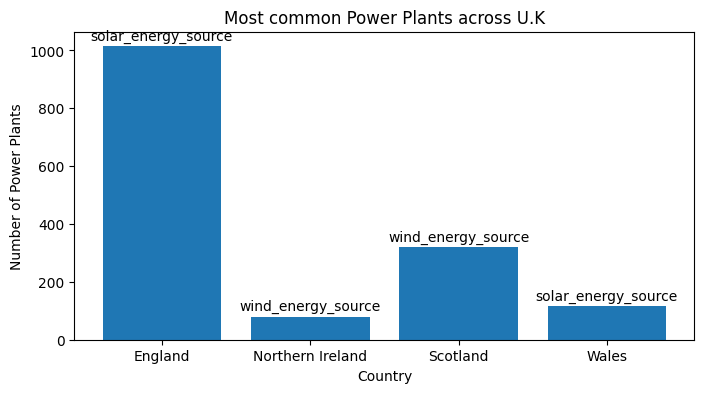

In [52]:
plt.figure(figsize=(8, 4))
bars = plt.bar(most_common_df.index, most_common_df['count'])
for bar, source in zip(bars, most_common_df['most_common_source']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, source, ha='center', va='bottom')
plt.xlabel("Country")
plt.ylabel("Number of Power Plants")
plt.title('Most common Power Plants across U.K')
plt.show()

<Axes: >

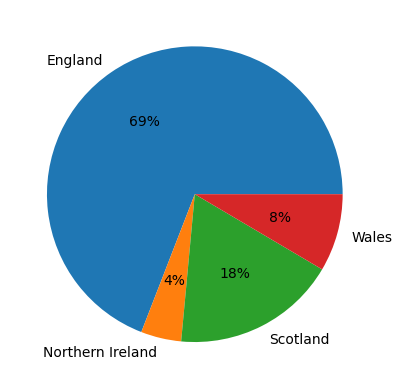

In [53]:
# Power plants ditribution accross U.K
rpp_ssy.groupby('country').size().plot(kind='pie', autopct='%1.0f%%')